In [1]:
import T2T_ACE.alignment_utilities as au
import T2T_ACE.interval_parsing  as ip
import T2T_ACE.alignment_visualization_utilities as avu

from T2T_ACE.validator import get_flanking_pairs

import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [9]:
class ReferenceLocations:
    whole_genome = False
    if whole_genome:
        hg002t2t = "/Users/fleharty/resources/hg002v1.0.fasta.gz"
        hg002t2tmat = "/Users/fleharty/resources/hg002mat_v1.0.fasta.gz"
        hg002t2tpat = "/Users/fleharty/resources/hg002pat_v1.0.fasta.gz"
        chm13 = "/Users/fleharty/resources/chm13v2.0.fa.gz"
        hg38 = "/Users/fleharty/resources/Homo_sapiens_assembly38.fasta"
        variant_call_fasta = "/Users/fleharty/AlignmentValidator/hg002_cnv_passing_variants_seq.fasta"
    else:
        hg002t2t = "/Users/fleharty/resources/hg002v1.0.chr1.fasta.gz"
        hg002t2tmat = "/Users/fleharty/resources/hg002mat_v1.0.chr1.fasta.gz"
        hg002t2tpat = "/Users/fleharty/resources/hg002pat_v1.0.chr1.fasta.gz"
        chm13 = "/Users/fleharty/resources/chm13v2.0.chr1.fa.gz"
        hg38 = "/Users/fleharty/resources/Homo_sapiens_assembly38.chr1.fasta.gz"
        variant_call_fasta = "/Users/fleharty/AlignmentValidator/hg002_cnv_passing_variants_seq.chr1.fasta"

In [3]:
hg002t2t = au.load_reference(ReferenceLocations.hg002t2t)

INFO:root:Loading reference from: /Users/fleharty/resources/hg002v1.0.chr1.fasta.gz


In [4]:
hg38 = au.load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/fleharty/resources/Homo_sapiens_assembly38.chr1.fasta.gz


In [5]:
# SIMPLE SMALL HET DELETION
simple_het_deletion = "chr1:103900576-103901103"
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:103900576-103901103", hg38, hg002t2t, True)
get_flanking_pairs("chr1:103900576-103901103", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:103900075-103900575 chr1:103901103-103901603 527
chr1_PATERNAL:104150915-104151415 chr1_PATERNAL:104151417-104151917 1
chr1_MATERNAL:104064755-104065255 chr1_MATERNAL:104065783-104066283 527


{'ref_flank': [('chr1:103900075-103900575', 'chr1:103901103-103901603', 527)],
 'truth_flank': [('chr1_PATERNAL:104150915-104151415',
   'chr1_PATERNAL:104151417-104151917',
   1),
  ('chr1_MATERNAL:104064755-104065255',
   'chr1_MATERNAL:104065783-104066283',
   527)]}

In [6]:
# SIMPLE SMALL HOM DELETION
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:176509082-176509637", hg38, hg002t2t, True)
get_flanking_pairs("chr1:176509082-176509637", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:176508581-176509081 chr1:176509637-176510137 555
chr1_MATERNAL:171407464-171407964 chr1_MATERNAL:171407964-171408464 -1
chr1_PATERNAL:179649935-179650435 chr1_PATERNAL:179650435-179650935 -1


{'ref_flank': [('chr1:176508581-176509081', 'chr1:176509637-176510137', 555)],
 'truth_flank': [('chr1_MATERNAL:171407464-171407964',
   'chr1_MATERNAL:171407964-171408464',
   -1),
  ('chr1_PATERNAL:179649935-179650435',
   'chr1_PATERNAL:179650435-179650935',
   -1)]}

In [7]:
# COMPLEX DELETION chr1:247687159-247693213
# Has 6 matches to hg38 chr1, why?
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:247687159-247693213", hg38, hg002t2t)
get_flanking_pairs("chr1:247687159-247693213", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:247686658-247687158 chr1:247693213-247693713 6054
chr1_PATERNAL:250807407-250807906 chr1_PATERNAL:250807908-250808408 1
chr1_MATERNAL:242717290-242717789 chr1_MATERNAL:242717791-242718291 1


{'ref_flank': [('chr1:247686658-247687158', 'chr1:247693213-247693713', 6054)],
 'truth_flank': [('chr1_PATERNAL:250807407-250807906',
   'chr1_PATERNAL:250807908-250808408',
   1),
  ('chr1_MATERNAL:242717290-242717789',
   'chr1_MATERNAL:242717791-242718291',
   1)]}

In [8]:
# This is a DUP that we are going to check if it is a deletion
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:248407554-248446847", hg38, hg002t2t)
get_flanking_pairs("chr1:248407554-248446847", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:248407053-248407553 chr1:248446847-248447347 39293
chr1_MATERNAL:243435680-243436180 chr1_MATERNAL:243475688-243476188 39507
chr1_PATERNAL:251525643-251526143 chr1_PATERNAL:251565663-251566162 39519


{'ref_flank': [('chr1:248407053-248407553',
   'chr1:248446847-248447347',
   39293)],
 'truth_flank': [('chr1_MATERNAL:243435680-243436180',
   'chr1_MATERNAL:243475688-243476188',
   39507),
  ('chr1_PATERNAL:251525643-251526143',
   'chr1_PATERNAL:251565663-251566162',
   39519)]}

In [9]:
# This is a Dragen DEL call that is filtered by MinQUAL
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:3643704-3644335", hg38, hg002t2t)
get_flanking_pairs("chr1:3643704-3644335", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:3643203-3643703 chr1:3644335-3644835 631
chr1_MATERNAL:3303559-3304059 chr1_MATERNAL:3304181-3304681 121
chr1_PATERNAL:3268791-3269291 chr1_PATERNAL:3269413-3269913 121


{'ref_flank': [('chr1:3643203-3643703', 'chr1:3644335-3644835', 631)],
 'truth_flank': [('chr1_MATERNAL:3303559-3304059',
   'chr1_MATERNAL:3304181-3304681',
   121),
  ('chr1_PATERNAL:3268791-3269291', 'chr1_PATERNAL:3269413-3269913', 121)]}

In [10]:
# This is a Dragen DEL call that is filtered by cnvLength
# Note that the joined sequence on hg002 only matches (0-50) on PATERNAL, and there is no (51-100) match on PATERNAL.
# I think this is because the Dragen caller may be estimating the size too small?
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:14109814-14112366", hg38, hg002t2t)
get_flanking_pairs("chr1:14109814-14112366", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:14109313-14109813 chr1:14112366-14112866 2552
chr1_PATERNAL:13669783-13670283 chr1_PATERNAL:13671061-13671483 777
chr1_MATERNAL:13752923-13753423 chr1_MATERNAL:13755975-13756475 2551


{'ref_flank': [('chr1:14109313-14109813', 'chr1:14112366-14112866', 2552)],
 'truth_flank': [('chr1_PATERNAL:13669783-13670283',
   'chr1_PATERNAL:13671061-13671483',
   777),
  ('chr1_MATERNAL:13752923-13753423',
   'chr1_MATERNAL:13755975-13756475',
   2551)]}

In [19]:
get_flanking_pairs("chr1:125079843-125085826", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:125079342-125079842 chr1:125085826-125086326 5983
chr1_PATERNAL:128639718-128640218 chr1_PATERNAL:128646201-128646701 5982
chr1_MATERNAL:126674841-126675341 chr1_MATERNAL:126681305-126681805 5963


{'ref_flank': [('chr1:125079342-125079842', 'chr1:125085826-125086326', 5983)],
 'truth_flank': [('chr1_PATERNAL:128639718-128640218',
   'chr1_PATERNAL:128646201-128646701',
   5982),
  ('chr1_MATERNAL:126674841-126675341',
   'chr1_MATERNAL:126681305-126681805',
   5963)]}

In [11]:
stuff = ['chr10:39521557-39533371']
other_stuff = ['chr10_PATERNAL:39521557-39533371', 'chr10_MATERNAL:39475935-39487740', 'chr10_MATERNAL:39538510-39550326', 
               'chr10_MATERNAL:39486365-39498169', 'chr10_MATERNAL:39496794-39508598', 'chr10_MATERNAL:39507223-39519027', 
               'chr10_MATERNAL:39517652-39529456', 'chr10_MATERNAL:39528081-39539885']

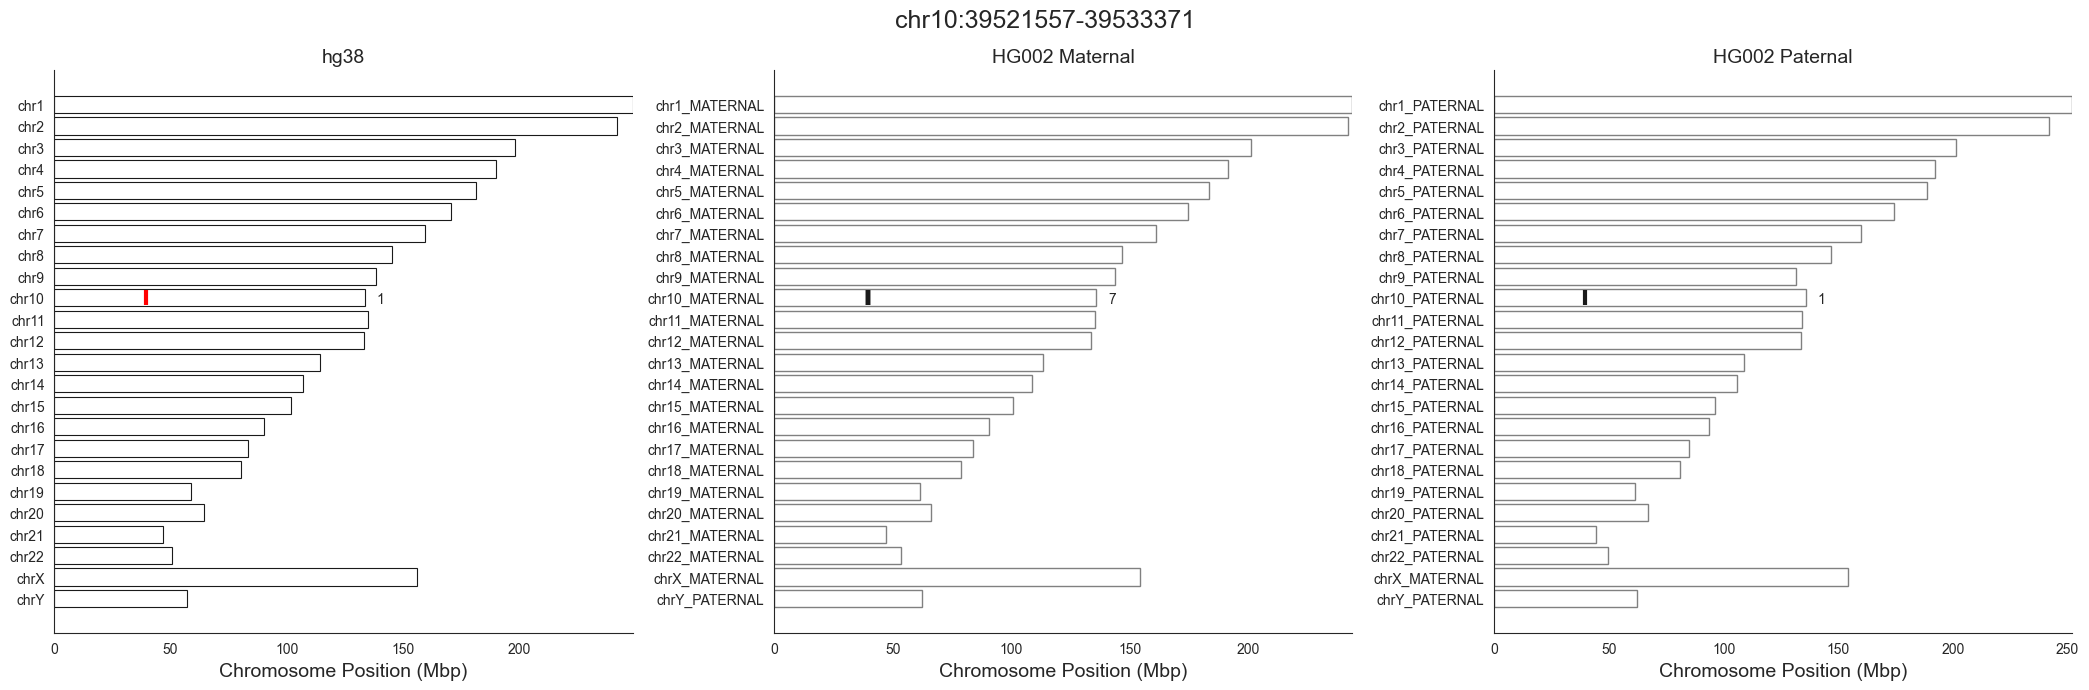

In [12]:
avu.PlotIntervals(stuff, other_stuff).plot_interval_on_chromo()

In [13]:
stuff = []
with open('../resources/chr1_deletions.txt', 'r') as file:
    for line in file:
        try:
            line = line.strip()  # Remove leading/trailing whitespaces and newline characters
            #print(line, check_interval(line, ReferenceLocations.hg38, hg38, hg002t2t))
            print("Event:", line, ip.interval_size(line))
            stuff.append(get_flanking_pairs(line, ReferenceLocations.hg38, hg38, hg002t2t))
            print()
        except:
            raise ValueError("Error on line: " + line)


Event: chr1:103900576-103901103 528
chr1:103900075-103900575 chr1:103901103-103901603 527
chr1_PATERNAL:104150915-104151415 chr1_PATERNAL:104151417-104151917 1
chr1_MATERNAL:104064755-104065255 chr1_MATERNAL:104065783-104066283 527

Event: chr1:104676027-104676834 808
chr1:104675526-104676026 chr1:104676834-104677334 807
chr1_MATERNAL:104845707-104846207 chr1_MATERNAL:104847015-104847515 807
chr1_PATERNAL:104930798-104931294 chr1_PATERNAL:104931306-104931806 11

Event: chr1:105124961-105125821 861
chr1:105124460-105124960 chr1:105125821-105126321 860
chr1_MATERNAL:105294441-105294941 chr1_MATERNAL:105295802-105296302 860
chr1_PATERNAL:105378856-105379347 chr1_PATERNAL:105379349-105379842 1

Event: chr1:108190708-108194629 3922
chr1:108190207-108190707 chr1:108194629-108195129 3921
chr1_MATERNAL:108364827-108365323 chr1_MATERNAL:108365340-108365840 16
chr1_PATERNAL:108447561-108448057 chr1_PATERNAL:108448074-108448574 16

Event: chr1:109059973-109060668 696
chr1:109059472-109059972 chr1

In [14]:
stuff[0]

{'ref_flank': [('chr1:103900075-103900575', 'chr1:103901103-103901603', 527)],
 'truth_flank': [('chr1_PATERNAL:104150915-104151415',
   'chr1_PATERNAL:104151417-104151917',
   1),
  ('chr1_MATERNAL:104064755-104065255',
   'chr1_MATERNAL:104065783-104066283',
   527)]}

In [15]:
stuff[1]

{'ref_flank': [('chr1:104675526-104676026', 'chr1:104676834-104677334', 807)],
 'truth_flank': [('chr1_MATERNAL:104845707-104846207',
   'chr1_MATERNAL:104847015-104847515',
   807),
  ('chr1_PATERNAL:104930798-104931294',
   'chr1_PATERNAL:104931306-104931806',
   11)]}

In [16]:
stuff[2]['ref_flank']

[('chr1:105124460-105124960', 'chr1:105125821-105126321', 860)]

In [17]:
stuff[2]['truth_flank']


[('chr1_MATERNAL:105294441-105294941',
  'chr1_MATERNAL:105295802-105296302',
  860),
 ('chr1_PATERNAL:105378856-105379347', 'chr1_PATERNAL:105379349-105379842', 1)]

In [18]:
import pysam
with pysam.FastaFile("../test/mock_reference.fasta") as ref_genome:
    # Fetch the sequence
    sequence = ref_genome.fetch("chr1", 0, 101001)
    print(sequence)

AGCTAGCTAGCTAGCT


In [23]:
import pysam

In [68]:
def read_vcf_pysam(file_path):
    vcf_file = pysam.VariantFile(file_path)
    variants = []

    for record in vcf_file:
        # Extract desired information from each record
        # Example: chromosome, position, id, reference base, alternative base(s), etc.
        variant_info = {
            'CHROM': record.chrom,
            'POS': record.pos,
            'ID': record.id,
            'REF': record.ref,
            'ALT': record.alts,
            'QUAL': record.qual,
            'FILTER': record.filter.keys(),
            'INFO': dict(record.info),
            'FORMAT': record.format
        }
        variants.append(variant_info)

    return variants


In [75]:
variants = pysam.VariantFile("../data/NA24385.cnv_sv.vcf.gz")

for record in variants:
    if record.filter.keys() == ['PASS']:
        print(record.id, record.info["SVTYPE"], record.info["SVCLAIM"][0], record.samples[0]["GT"])

DRAGEN:GAIN:chr1:789482-224014488 DUP J (0, 1)
DRAGEN:LOSS:chr1:934322-934937 DEL J (1, 1)
DRAGEN:LOSS:chr1:1934924-1935584 DEL J (0, 1)
DRAGEN:LOSS:chr1:1934990-1935584 DEL J (0, 1)
DRAGEN:LOSS:chr1:2122129-2124374 DEL J (0, 1)
DRAGEN:LOSS:chr1:6006004-6006574 DEL J (0, 1)
DRAGEN:GAIN:chr1:13225213-13247040 CNV D (None, 1)
DRAGEN:LOSS:chr1:13235348-13240700 DEL J (0, 1)
DRAGEN:LOSS:chr1:14109814-14111746 DEL J (0, 1)
DRAGEN:LOSS:chr1:14110578-14112444 DEL J (0, 1)
DRAGEN:LOSS:chr1:14331215-14331990 DEL J (0, 1)
DRAGEN:GAIN:chr1:16605769-16645359 CNV D (None, 1)
DRAGEN:GAIN:chr1:16715827-16727637 CNV D (None, 1)
DRAGEN:GAIN:chr1:16879015-16949283 CNV D (None, 1)
DRAGEN:LOSS:chr1:24478047-24480950 CNV DJ (0, 1)
DRAGEN:LOSS:chr1:24832197-24835018 DEL J (1, 1)
DRAGEN:LOSS:chr1:25258202-25284564 CNV D (0, 1)
DRAGEN:LOSS:chr1:30567799-30568814 DEL J (0, 1)
DRAGEN:LOSS:chr1:36958605-36960147 DEL J (0, 1)
DRAGEN:LOSS:chr1:43106315-43107075 DEL J (0, 1)
DRAGEN:LOSS:chr1:53128426-53129276 CNV D

In [17]:
import importlib
import T2T_ACE.cnv_evaluator as ce
importlib.reload(ce)

<module 'T2T_ACE.cnv_evaluator' from '/Users/fleharty/T2T-ACE/T2T_ACE/cnv_evaluator.py'>

In [18]:
cnv_evaluator = ce.CNV_Evaluator(ReferenceLocations.hg38, ReferenceLocations.hg002t2tmat, ReferenceLocations.hg002t2tpat)

INFO:root:Loading reference from: /Users/fleharty/resources/Homo_sapiens_assembly38.chr1.fasta.gz
INFO:root:Loading reference from: /Users/fleharty/resources/hg002mat_v1.0.chr1.fasta.gz
INFO:root:Loading reference from: /Users/fleharty/resources/hg002pat_v1.0.chr1.fasta.gz
